In [20]:
import itertools
from random import random, randrange, choice

In [21]:
class Ant(object):
    def __init__(self, id_, x, y, memory_size, has_trash):
        self.id_ = id_
        self.x = x
        self.y = y
        self.memory_size = memory_size
        self.has_trash = has_trash
        self.memories = [0] * self.memory_size
        
    def update_position(self, new_x, new_y):
        self.x = new_x
        self.y = new_y
        
    def count_memories(self):
        return self.memories.count(1)
    
    def add_memory(self, value):
        self.memories.pop()
        self.memories.insert(0, value)

In [22]:
def check_possible_moves(x, y, vision_range=1):
    left_x = x
    if -1 < x - vision_range < len(ocean):
        left_x = x - vision_range
        
    right_x = x
    if -1 < x + vision_range < len(ocean):
        right_x = x + vision_range
    
    left_y = y
    if -1 < y - vision_range < len(ocean):
        left_y = y - vision_range
    
    right_y = y
    if -1 < y + vision_range < len(ocean):
        right_y = y + vision_range
    
    ant_vision = ant_map.loc[left_y:right_y, left_x:right_x]
    
    moves_x = ant_vision.columns.tolist()
    moves_y = ant_vision.index.tolist()
    
    possible_moves = [[x, y] for x in moves_x for y in moves_y if ant_map.at[y, x] == 0]
    
    return possible_moves

In [23]:
def drop_probability(ant, drop_constant):
    fx = ant.count_memories() / ant.memory_size
    return (fx / drop_constant + fx)**2

In [24]:
def pick_probability(ant, pick_constant):
    fx = ant.count_memories() / ant.memory_size
    return (pick_constant / pick_constant + fx)**2

In [25]:
def move_ants(ocean, ants, ant_map, drop_constant, pick_constant):
    random_value = random()
    
    for ant in ants:
        possible_moves = check_possible_moves(ant.x, ant.y)
        
        if len(possible_moves) > 0:
            move = choice(possible_moves)

            ant_map.at[move[1], move[0]] = 1

            if ocean.at[move[1], move[0]] == 1 and ant.has_trash == 0:
                pick_value = pick_probability(ant, pick_constant)
                if random_value < pick_value:
                    ocean.at[move[1], move[0]] = 0
                    ant.has_trash = 1
                ant.add_memory(1)
                # print(f"Ant {ant.id_} had nothing and found trash!")
            elif ocean.at[move[1], move[0]] == 1 and ant.has_trash == 1:
                ant.add_memory(1)
                # print(f"Ant {ant.id_} had trash and found trash!")
            elif ocean.at[move[1], move[0]] == 0 and ant.has_trash == 1:
                drop_value = drop_probability(ant, drop_constant)
                if random_value < drop_value:
                    ocean.at[move[1], move[0]] = 1
                    ant.has_trash = 0
                ant.add_memory(0)
                # print(f"Ant {ant.id_} had trash and did not find anything!")
            elif ocean.at[move[1], move[0]] == 0 and ant.has_trash == 0:
                ant.add_memory(0)
                # print(f"Ant {ant.id_} did not have trash and did not find anything!")
    return ocean

**DISEÑAR ALGORITMO CON UNA HORMIGA PARA VER SU COMPORTAMIENTO Y EFICIENCIA**

Una hormiga comprobará todas las posiciones visitables del mapa, y si dichas posiciones están o no en su memoria, que en caso de estarlo y no ser un punto de recogida no se visitarán. Pero si por el contrario, la hormiga tiene basura y ha depositado basura en una posición aún en su memoria, retrocederá hasta dicha concentración de basura para soltarla, sino buscará una posible ubicación aleatoria. Sino, por defecto, la hormiga sigue un recorrido aleatorio tenga o no basura y/o información del destino.

In [26]:
import pickle

In [27]:
with open('test_data.pickle', 'rb') as data:
    ocean = pickle.load(data)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

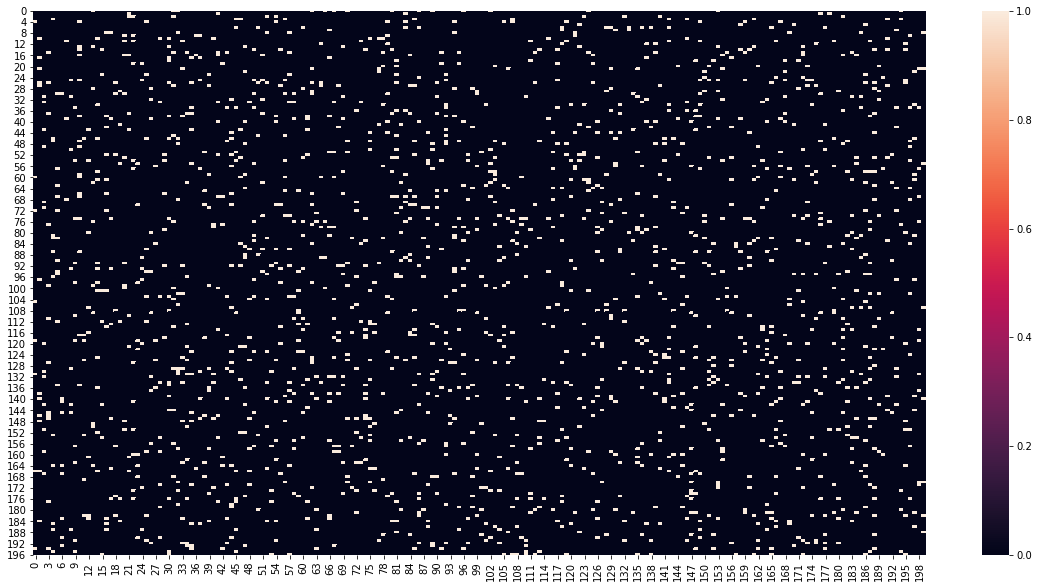

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(ocean)

In [30]:
import pandas as pd

In [31]:
data = [[0 for x in range(len(ocean))] for y in range(len(ocean))]
ant_map = pd.DataFrame(data)

In [32]:
ants = list()

total_ants = 100
memory_size = 50

In [33]:
for ant in range(1, total_ants + 1):
    flag = False
    
    while flag is False:
        x = randrange(len(ocean))
        y = randrange(len(ocean))

        if ant_map.at[y, x] == 1:
            pass
        
        if ocean.at[y, x] == 1:
            ants.append(Ant(id_=ant, x=x, y=y, memory_size=memory_size, has_trash=1))
            ant_map.at[y, x] = 1
            flag = True
        elif ocean.at[y, x] == 0:
            ants.append(Ant(id_=ant, x=x, y=y, memory_size=memory_size, has_trash=0))
            ant_map.at[y, x] = 1
            flag = True

In [34]:
%%time

steps = 100000

while steps > 0:
    ocean = move_ants(ocean, ants, ant_map, .3, .1)
    steps -= 1

CPU times: user 39min 25s, sys: 35.9 s, total: 40min
Wall time: 47min 56s


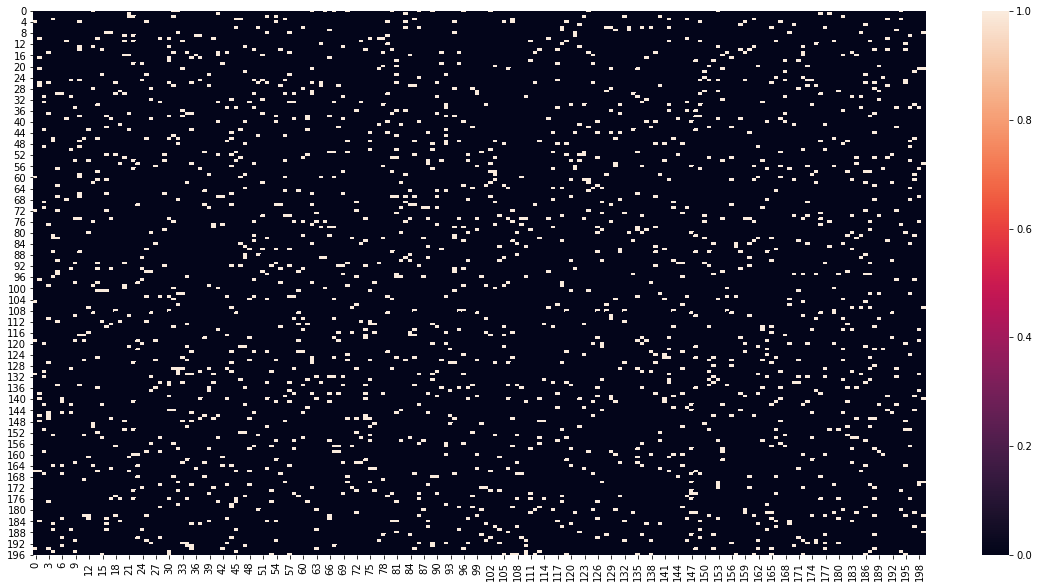

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(ocean)